# **Custos Médicos: K-NN**

A ideia neste problema é estimar o custo do seguro no plano de saúde para uma pessoa com base em dados adicionais como idade, se é fumante ou não, se tem dependentes, etc.

Isto quer dizer que temos considerar que nuestra variável dependiente será o **_Custo_** e as caraterísticas restantes serão consideradas como as variáveis independientes, em outras palavras o **Custo** depende (umas vezes mais e outras menos) de todas as outras variáveis

O Primeiro a fazer é estabelecer a influencia de todas essas variáveis (caraterísticas) no valor final dos Custos Médicos, de forma individual.

**_É importante lembrar que temos que ter a capacidade de predecir um valor de custo para uma nova pessoa (cliente) com base as suas proprias caraterísticas_.**

Iniciemos esta análise selecionando os dados que vamos a utilizar.

# Importação dos dados:

Os dados podem ser obtido do site do Kaggle.com : https://www.kaggle.com/datasets/mirichoi0218/insurance

Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/profjuanito/Dataset/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Informações dos dados:

Obter informações gerais dos dados como número de variáveis, tipo, etc.     

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver a primeira estatística dos dados usando -> _.describe_:

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Análise Exploratória de Dados:

Poderiamos fazer uma análise, olheando todas as variáveis uma por uma. Mas, temos no phyton uma ferramenta que permite fazer uma preanálise rápida.

Temos que instalar uma biblioteca -> *sweetviz*

Depois de importar a biblioteca, definimos para  a nossa análise rápida a variável resposta ´**Custos**´, e observar se existe correlacão ou muita dependência com as outras variáveis (foi mostrado na versão anterior - Regressão Linear).

# Mise en place para Modelagem

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero.

Para tanto, façamos as seguintes transformações:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta primeira análise vamos considerar só as variáveis:
* var. dependiente: **Custos**
* var. independientes: indice de massa corporal (**IMC**) e ser fumante ou não.

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


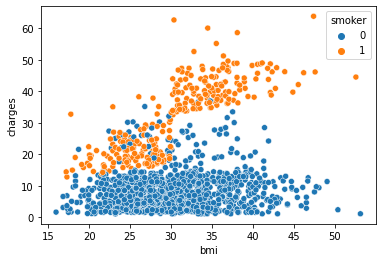

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---
---

# Validação dos Modelos

Para poder validar o nosso modelo temos que criar um conjunto de aprendizado (para realizar o ajuste) e um conjunto e prova (para teste). Isto é, de todos nossos temos que ter uma forma aleatória de criar estes conjuntos.

* Precisamos separar os conjuntos usando o comando -> *train_test_split*
   * X_treino, X_teste
   * y_treino, y_teste

In [ ]:
# Considerando o modelo com DUAS variáveis preditoras

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

### Para Regressão Linear com duas variáveis independentes:
$$Custos = b_0 + b_1 \cdot IMC + b_2 \cdot Fumante $$

In [ ]:
# Técnica HOLDOUT
from sklearn.model_selection import train_test_split 

In [ ]:
# Separe os dados em teste e treinamento 
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

Xtreino.shape

(1003, 2)

In [ ]:
# Ajuste do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)

# Utilize o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste) 

# Calcule o Erro Quadrático Médio nos dados de TESTE 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 45.77


In [ ]:
# Coeficientes do ajuste

b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

b0 =  -3.2884510258764106
b1 =  0.39006522838651364
b2 =  23.23401325218598


A equação do ajuste é dada por:

$$Custos = -3.288 + 0.390 \cdot IMC + 23.234 \cdot Fumante $$



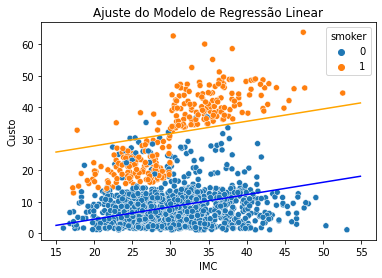

In [ ]:
# Gráfico do Ajuste com DUAS Variáveis

x = np.arange(15, 55, 0.1)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

## Para o Modelo K-NN


Primeiro temos que importar a biblioteca -> _sklearn.neighbors_

onde será usado o comando -> _KNeighborsRegressor_

Começamos usando um k = 37 (número arbitrario) que indica o número de vizinhos próximos, só para mostrar o método.

O proceso será repetido R = 100 vezes, a fim de fazer uma estatística e verificar a consistência dos resultados.


### Com uma variável independente:

A primeira parte será usando só uma variável independente **IMC** (índice de massa corporal) e o **Custo** como variável dependiente 

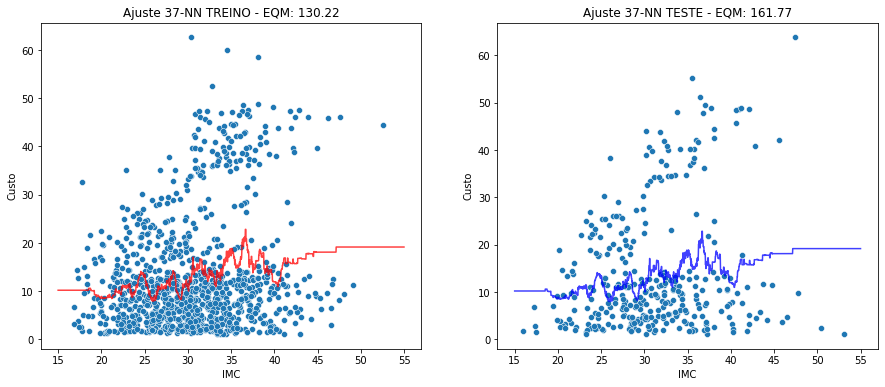

In [ ]:
# Gráfico do KNN com 1 Variável 

from sklearn.neighbors import KNeighborsRegressor

X = dados[['bmi']]
y = dados['charges'] 
k = 37

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

In [ ]:
# Cálculo de eqm (erro quadrático médio)
from sklearn.model_selection import train_test_split 

X = dados[['bmi']]
y = dados['charges'] 
k = 37
R = 100

eqms_treino = []
eqms_teste = []

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino) 

    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = knn.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O EQM de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O EQM de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O EQM de TREINO foi: 136.20
O EQM de TESTE  foi:  143.24


### Com duas variáveis independentes:

A segunda parte será usando duas variáveis independentes **IMC** (índice de massa corporal) e ser **fumante** (variável categórica). O **Custo** é considerada a variável dependiente. 

Começamos usando um k = 15 (número arbitrario) que indica o número de vizinhos próximos, só para mostrar o método.

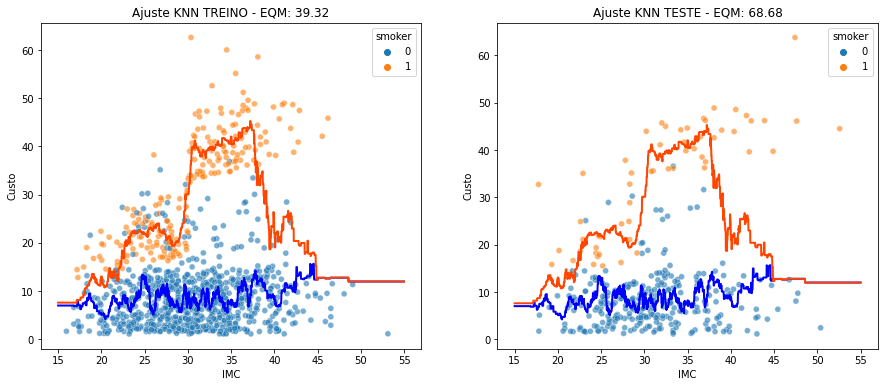

In [ ]:
# Gráfico do Modelo com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges'] 
k = 15

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

---
---

## **Técnica de Validação: _Holdout Repetido_**

Por ser aleatoria a seleção dos conjuntos, é melhor fazer varias vezes este procedimento e assim obter uma estatística para calcular o valor mais estável para o EQM.

Como será feita uma comparação entre o modelo de **K-NN** (com diferentes valores de k) com o modelo de **Regressão Linear** é preferível criar uma função a qual será chamada por cada modelo.  

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste 

Testamos a chamada da função com k=20

In [ ]:
HoldoutRepetido(KNeighborsRegressor(n_neighbors = 20))

EQM médio de TREINO: 48.77
EQM médio de TESTE: 54.45



(48.77, 54.45)

Para utlizar varios modelos criamos um dicionario de modelos: 

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 49.97
EQM médio de TESTE: 50.77

EQM médio de TREINO: 31.36
EQM médio de TESTE: 47.14

EQM médio de TREINO: 43.94
EQM médio de TESTE: 51.61

EQM médio de TREINO: 54.03
EQM médio de TESTE: 59.42

EQM médio de TREINO: 67.8
EQM médio de TESTE: 73.17

EQM médio de TREINO: 80.36
EQM médio de TESTE: 85.57



,EQM Treino,EQM Teste
KNN - K = 5,31.36,47.14
Regressão Linear,49.97,50.77
KNN - K = 15,43.94,51.61
KNN - K = 25,54.03,59.42
KNN - K = 35,67.80,73.17
KNN - K = 45,80.36,85.57


## Conclusão

Nesta análise usando o modelo K-NN para diferentes valores de **K** podemos concluir que o valor de K é um fator muito importante na hora de fazer a nossa predição.

A realização dos teste de validação mostra que o nosso erro médio quadrático (**eqm**) é menor para um **K = 5**. Este valor, para o caso do conjunto de treino, resultou muito menor que utilizando uma **Regressão Linear**. Mas para o caso do conjunto de teste o modelo **K-NN** resultou ligeramente melhor.  

Na próxima análise se fará uma comparação com o modelo de **Árvore de Decisão**. E para próximas análises serão incluidas novas variáveis e espera-se diminuir o valor do **eqm** e que os resultados sejam igual de consistentes.